# **Working with one feature: OLS**

**Dataset:**

It is about thousands of dollars spent on adverstising on TV, radio and newspaper to increase sales. 

Let's find Relationship that how spending on advertisement affect increment in sales?

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/sample_data/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


We have 3 features here: TV, radio and newspaper.

Let's combine them into one to make them one feature so we can apply OLS.

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [6]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


Let's visualize the relationship between total spend and sales. (feature and target variable)

<Axes: xlabel='total_spend', ylabel='sales'>

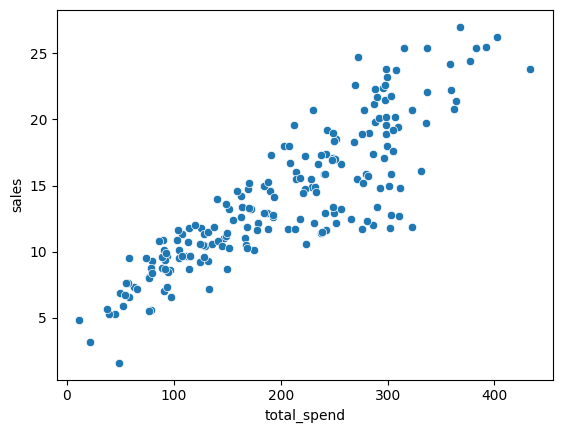

In [7]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df)

**Analysis**

It shows as we spend more, we get higher sales.

To visualize a line, we use regplot. (DONT MIX IT WITH RUGPLOT.)

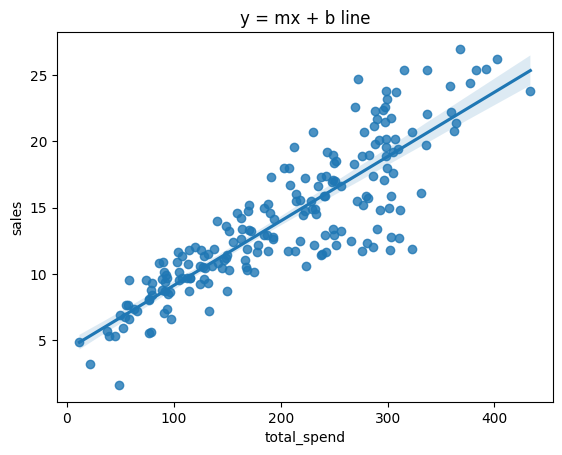

In [11]:
sns.regplot(x = 'total_spend', y = 'sales', data = df)
plt.title('y = mx + b line');

# **Prediction:**

Suppose we have spent 400$ on advertisement, then how many sales we are gonna have?

In [12]:
X = df['total_spend']
y = df['sales']

**Apply Ordinary Least Square using Least Square Polynomial Fit.**

In [17]:
np.polyfit(X,y, deg = 1) # degree means degree of polynomial which is 1 because we have 1 feature

array([0.04868788, 4.24302822])

So, now we have

$\beta_1$ = 0.04868788

$\beta_0$ = 4.24302822

Now use it to make prediction and then we will calculate error.

In [21]:
potential_spend = np.linspace(0,500, 100) # values created just to make predictions. Nothing else. Just to check if model is working correctly
potential_spend 

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [25]:
potential_sales = 0.04868788 * potential_spend + 4.24302822

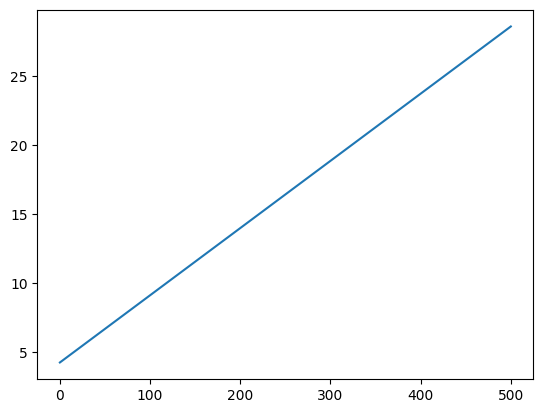

In [27]:
plt.plot(potential_spend, potential_sales);

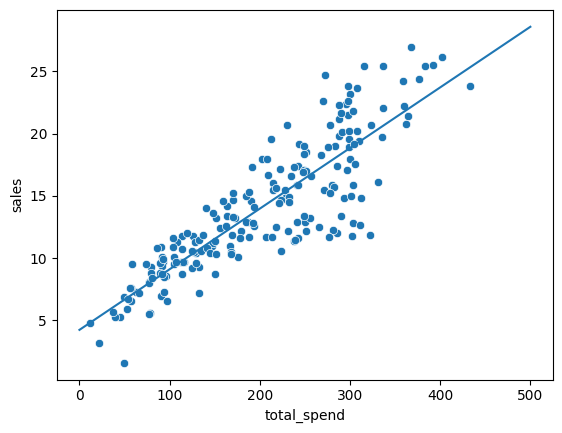

In [28]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df)
plt.plot(potential_spend, potential_sales);

It is same thing that we did using regplot.

Let's make prediction.

In [29]:
spend = 400
potential_sales = 0.04868788 * spend + 4.24302822
potential_sales

23.71818022

How to know if our prediction is right or wrong?

Answer: It can only be done if we have train-test split. Using polyfit for it is not a good idea. For it we need scikit learn. It will also help us to check overfitting and underfitting.

# **Let's just play for fun**

Although we know we have one feature and we can use only 1 degree of polynomial. But let's use more than one degree and see what happens to the fitted line.

In [30]:
np.polyfit(X, y, deg = 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [31]:
potential_spend = np.linspace(0,500,100)

# Now it has become: B3 X^3 + B2 X^2 + B1 X + B0
potential_sales = 3.07615033e-07 * potential_spend ** 3 + -1.89392449e-04 * potential_spend ** 2 +  8.20886302e-02 * potential_spend +   2.70495053e+00

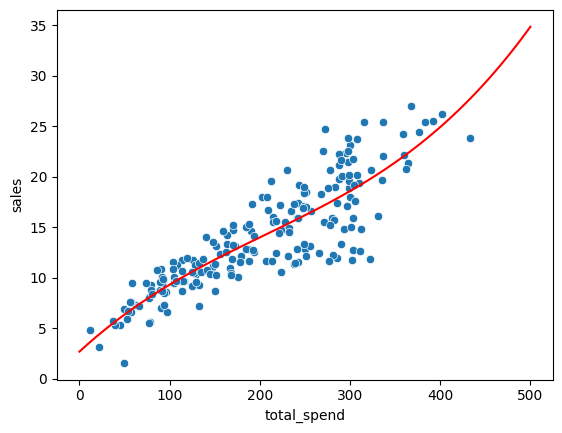

In [34]:
sns.scatterplot(x = 'total_spend', y = 'sales', data = df)
plt.plot(potential_spend, potential_sales, color = 'red');

The line is curvy because we have polynomial degree 3 here. 

It means we have now two methods:

1. Linear fit

2. Curvy fit